## REI602M Machine Learning - Homework 8 (**UNDER CONSTRUCTION!!!**)
### Due: *Monday* 11.3.2019

**Objectives**: Topic discovery with NMF, Image compression with PCA and NMF, Spectral clustering

**Name**: Emil Gauti Friðriksson, **email: ** egf3@hi.is, **collaborators:** (if any)

1\. [*Topic discovery with NMF*, 40 points]. Here you will use non-negative matrix factorization (NMF) to analyze the content of tweets from Donald Trump. In particular, you will attempt to discover the main topics of his tweets by applying NMF to a document-term matrix derived from the tweets (or rather to a "tweet-term" matrix).

The NMF approximates a non-negative $n \times p$ matrix $X$ of rank $r$ with a rank $k \leq r$ matrix such that

$$
X \approx WH
$$

where $W$ is a $n \times k$ matrix with $W_{ij} \geq 0$ and $H$ is a $k \times p$ matrix with $H_{ij} \geq 0$. Provided that $k$ is appropriately chosen, the *weight matrix* $W$ and *coefficient matrix* $H$ can reveal interesting structures in the data. Column $j$ of $X$ is approximated with (see comment 1 below)

$$
X_{:,j} \approx (WH)_{:,j} = H_{1j}W_{:,1} + H_{2j}W_{:,2} + \ldots + H_{kj}W_{:,k}
$$

where the subscript $:,j$ denotes column $j$. The columns of $W$ in this context correspond to the main topics of Trump's tweets and column $j$ of $H$ contains information on how the topics are "mixed" together to form (approximately) column $j$ of $X$.

a) Download all tweets by Trump from http://www.trumptwitterarchive.com/archive from the period 20.1.2017 (inauguration day) to present, omitting retweets, as a CSV file (approx. 5800 tweets). Create a tweet-term matrix using word counts (see below). For a given value of $k$, perform NMF on the matrix and list the words corresponding to the largest $H_{ij}$ values for columns $j=1,\ldots,k$. You need to experiment with different values of $k$ (a.k.a. the *Trump-dimension*) to get interesting topic groupings. If $k$ is too low different topics will be mixed together, when $k$ gets large, the same subject will appear in multiple clusters. Report your results (c.a. 20 words on each topic) for the value of $k$ that you end up picking.

b) Select two topics of "interest" (e.g. Trump's nemesis Hillary Clinton). Identify the corresponding columns in $W$ and list approx. 5 tweets using the largest $W$-values as indices. Does the content of the tweets match the selected topics?

*Comments*:

1) The $n \times k$ matrix-vector product $y=Ax$ can be interpreted as a weighted sum of the columns of $A$,
$$
y=
\begin{array}{ccc}
~\mid &  & ~\mid \\
x_1 a_1 & + \ldots + & x_k a_k \\
~\mid & & ~\mid \\
\end{array}
$$
and matrix multiplication can be considered as multiple matrix-vector products.

2) Use the NMF implementation in`from sklearn.decomposition.NMF`. You can use the Wikipedia data set from HW7 to test your NMF-based topic discovery code. Once you get convincing results, apply your code to the newly constructed tweet-term matrix.

3) Use `sklearn.feature_extraction.text.CountVectorizer` to create the document-term matrix based on word counts from the raw tweets. This function performs tokenization, counting and normalization and removes stop words. Use the following parameter values `max_features=k`, `max_df=0.95` (remove words that occur in at least 95% of the documents), `min_df=2` (remove words that occur in fewer than two documents), `stop_words='english'`.

4) Use `CountVectorizer.get_feature_names()` to get the list of words that were retained. Sidenote: Rare words are downplayed by the term-frequency encoding used here but they are often found to be informative. Therefore people often encode the text using term-frequency-inverse document frequency.

5) Scikit's NMF function obtaines the factorization $X \approx WH$ by minimizing the objective function $0.5||X - WH||_F^2$ (here $||A||_F$ denotes the Frobenius norm of a matrix $A$, $||A||_F = \sqrt{\sum_{i=1}^n \sum_{j=1}^n A_{ij}^2}$. The NMF implementation provides means to regularize the solution via parameters `alpha` and `l1_ratio`. You may want to experiment with these parameters to see if you can improve the list of topics.

6) The $H$ matrix is stored in `nmf.components_`

7) The NMF is described briefly in section 14.6 of ESL. A more detailed account can be found in the original article
http://www.columbia.edu/~jwp2128/Teaching/E4903/papers/nmf_nature.pdf

In [15]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
def print_top_words(nmf,feature_names, n_top_words):
    for nr, topic in enumerate(nmf.components_,1):
        top_words_indx = topic.argsort()[:-n_top_words - 1:-1]
        ordd = ''
        for i in range(n_top_words):
            ordd += feature_names[top_words_indx[i]]+' '
        print('flokkur nr', nr, ':', ordd)


data = np.genfromtxt('trump_tweets.CSV',encoding="utf-8", delimiter=',',dtype=str,skip_header=1)
k=10

vectorizer = CountVectorizer(max_df=0.95,min_df=2, stop_words='english')
X = vectorizer.fit_transform(data)#þessi gæji heldur utan um hve oft orðin koma fyrir

nmf = NMF(n_components=k,init='random', random_state=0,alpha=.1, l1_ratio=.5).fit(X)


feature_names = vectorizer.get_feature_names()


print_top_words(nmf, feature_names, 20)

flokkur nr 1 : amp military repeal replace strong loves taxes women years borders vets going nation said work hard getting healthcare dems economy 
flokkur nr 2 : people country american want way years enemy come like coming going millions time working million laws let history know bad 
flokkur nr 3 : news fake media cnn just story don stories bad reporting new said dishonest enemy nbc good house like report time 
flokkur nr 4 : border wall security democrats want country crime don southern immigration stop need military drugs republicans laws dems mexico national open 
flokkur nr 5 : fbi collusion witch hunt hillary democrats russia clinton crooked campaign comey just russian mueller rigged election angry hoax dossier investigation 
flokkur nr 6 : president trump obama donald thank election campaign just administration did xi said russia american foxandfriends right day years china isis 
flokkur nr 7 : trade korea united china north states just deal good country years time tariffs cou

**(b)**
Ég vel flokkana sem mér sýnist tengjast **Border Wall**(flokkur nr. 4) og **Fake News**(flokkur nr. 3)

In [13]:
W = nmf.transform(X)
bw_fn = [2,3]
n_tweets = 5
for ind in bw_fn:
    weight = W[:,ind]
    top_tweets = np.argsort(weight)[::-1]
    print('flokkur', ind+1)
    print('-'*50)
    for i in range(n_tweets):
        print('tweet',i+1,':',data[top_tweets[i]],'\n')

flokkur 3
--------------------------------------------------
tweet 1 : Google search results for “Trump News” shows only the viewing/reporting of Fake News Media. In other words they have it RIGGED for me &amp; others so that almost all stories &amp; news is BAD. Fake CNN is prominent. Republican/Conservative &amp; Fair Media is shut out. Illegal? 96% of.... 

tweet 2 : CNN and others in the Fake News Business keep purposely and inaccurately reporting that I said the “Media is the Enemy of the People.” Wrong! I said that the “Fake News (Media) is the Enemy of the People” a very big difference. When you give out false information - not good! 

tweet 3 : Google search results for “Trump News” shows only the viewing/reporting of Fake New Media. In other words they have it RIGGED for me &amp; others so that almost all stories &amp; news is BAD. Fake CNN is prominent. Republican/Conservative &amp; Fair Media  is shut out. Illegal?  96% of... 

tweet 4 : The Fake News refuses to talk about h

2\. [*Image compresssion with PCA and NMF*, 30 points] Fit a non-negative matrix factorization model to the zero-digits in the subset of the MNIST database from the Jupyter workbook `v07_pca_tsne_kmeans` (download from Piazza). Perform the following using 25 basis elements in the factorization:

i) Display the $W$ matrix as an image (see Fig. 14.33 in ESL) as well as an image for the part of $H$ that corresponds to the first image in the data set.

ii)  Compare a reconstruction of the first image in the data set with the original image. What compression ratio is achieved with 25 basis elements?

b) Repeat the analysis in a using 24-component (plus mean) PCA model (see Fig. 14.33 in ESL). Compare briefly with the results in a)

*Comments*:

1) Use the NMF implementation in `sklearn.decomposition.NMF`. The *columns* of the input matrix should contain the pixel values for each image (this is opposed to how we treated image data earlier). The `fit_transform` function returns the $W$ matrix and the attribute `components_` contains the $H$ matrix.

2) When reconstructing images you may need to "clip" the data, i.e. set pixel values above 1.0 to 1.

3) Many elements of the $W$ matrix will be zero and when you use a gray-scale color map, these elements will show up as black. You might therefore want to represent positive values with black and zeros with white.

4) Use scikit to perform PCA.

In [17]:
# Principal component analysis and t-SNE used to examine
# the MNIST dataset of handwritten digits

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load MNIST dataset (small subset)
X = np.loadtxt("data/mnist2500_X.txt")
labels = np.loadtxt("data/mnist2500_labels.txt")

# Scale data to have zero mean, scaling individual features 
# is not appropriate for image data
Xsc = StandardScaler(with_std=False).fit_transform(X)

def scatter_plot(ypred, labels, xlabel='', ylabel=''):
    # Create a scatter plot with class labels as a legend
    #plt.figure(figsize=(7,5))
    cmap=plt.get_cmap("Paired").colors[0:10]
    for cls in range(0,10):
        plt.scatter(ypred[labels==cls,0],ypred[labels==cls,1],s=10,c=cmap[cls],label="{}".format(cls))
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

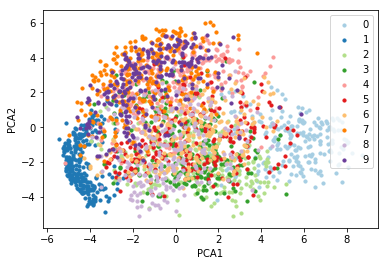

In [18]:
# 2D projection using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(Xsc)
ypred = pca.transform(Xsc)

scatter_plot(ypred, labels, xlabel='PCA1',ylabel='PCA2')

3\. [*Spectral clustering*] Under construction!